### Import the requires libraries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

### Read the dataset:

In [2]:
df = pd.read_csv("day - day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Check the shape of the dataset:

In [3]:
df.shape

(730, 16)

There are 730 rows and 16 columns present in the dataset.

### Check the data types:

In [4]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

### Check the null values:

In [5]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing / null values 

### Check for duplicate values:

In [6]:
df_dropped = df.drop_duplicates()
df_dropped.shape

(730, 16)

There were no duplicate values in the data

### Five Point Summary Statistics:


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.995890,2.000339,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.690411,0.462641,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [8]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Based on the above informations,

i.) The column `instant` is just like a serial number (record index), so we can remove this column.

ii.) `dteday` column's information is already present in other columns such as `mnth` and `yr` columns, so we can drop this column.

iii.) The information present in `casual` and `registered` column already available in `cnt` column, so we can drop these two columns.

### Creating New Dataframe:

In [9]:
df_new = df.drop(["instant","dteday","casual","registered"], axis=1)
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df_new.shape

(730, 12)

### Renaming the columns:

In [11]:
df_new = df_new.rename(columns=({"season":"Season","yr":"Year","mnth":"Month","holiday":"Holiday","weekday":"Weekday",
                    "workingday":"Workingday","weathersit":"Weather","temp":"Temperature","atemp":"FeelingTemperature",
                    "hum":"Humidity","windspeed":"WindSpeed","cnt":"Count"}))
df_new.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,FeelingTemperature,Humidity,WindSpeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
df_new.to_csv("New_bike_dataset.csv")

In [13]:
dff = pd.read_csv("New_bike_dataset.csv")
dff.drop("Unnamed: 0",axis=1,inplace=True)
dff.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weather,Temperature,FeelingTemperature,Humidity,WindSpeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
dff.dtypes

Season                  int64
Year                    int64
Month                   int64
Holiday                 int64
Weekday                 int64
Workingday              int64
Weather                 int64
Temperature           float64
FeelingTemperature    float64
Humidity              float64
WindSpeed             float64
Count                   int64
dtype: object

## Exploratory Data Analysis

In [15]:
dff_copy = dff.copy()

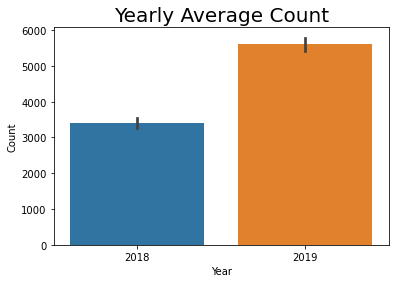

In [16]:
dff_copy['Year'] = dff_copy['Year'].map({0:'2018',1:'2019'})

sns.barplot(dff_copy['Year'],dff_copy['Count'])

plt.title('Yearly Average Count', fontsize = 20)
plt.show()

The above barplot shows that `Year` 2019 has the highest demand for bike rentals

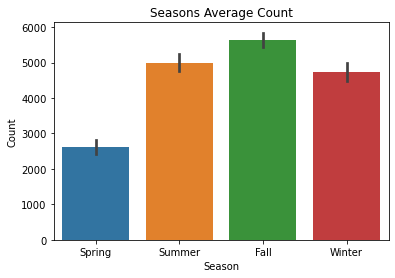

In [17]:
dff_copy['Season'] = dff_copy['Season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

sns.barplot(dff_copy['Season'],dff_copy['Count'])

plt.title('Seasons Average Count')
plt.show()

This above plot shows that Fall Season seems to be highest demand for Rental Bikes, followed by Summer and Winter.

Spring Season seems to be the least Season.

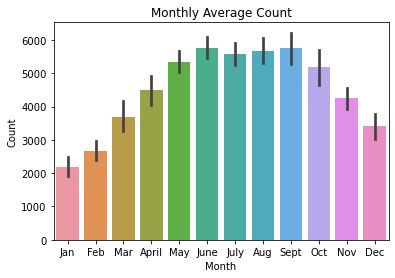

In [18]:
dff_copy['Month'] = dff_copy['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 
                                           9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

sns.barplot(dff_copy['Month'],dff_copy['Count'])

plt.title('Monthly Average Count')
plt.show()

Here, Most of the average count of rented bikes in August, June, September, July. 
So, More bikes should be keep ready during these months.

December, January, February have the least demand probably due to winter season

### Data Preparation:

In [19]:
categorical = ['Season', 'Year', 'Month', 'Holiday', 'Weekday', 'Workingday', 'Weather']

for i in categorical:
    dff[i] = dff[i].astype('category')

In [20]:
dff.dtypes

Season                category
Year                  category
Month                 category
Holiday               category
Weekday               category
Workingday            category
Weather               category
Temperature            float64
FeelingTemperature     float64
Humidity               float64
WindSpeed              float64
Count                    int64
dtype: object

### Creating Dummy Variables:

In [21]:
dummy = pd.get_dummies(dff[categorical], drop_first=True)
dummy.head()

,Season_2,Season_3,Season_4,Year_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Holiday_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Workingday_1,Weather_2,Weather_3
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [22]:
numeric = dff.select_dtypes("number")
numeric.head()

,Temperature,FeelingTemperature,Humidity,WindSpeed,Count
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600


### Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
numeric_sc = scaler.fit_transform(numeric)

numeric_scc = pd.DataFrame(numeric_sc, columns=numeric.columns)

numeric_scc.head()

,Temperature,FeelingTemperature,Humidity,WindSpeed,Count
0,0.355170,0.373517,0.828620,0.284606,0.110792
1,0.379232,0.360541,0.715771,0.466215,0.089623
2,0.171000,0.144830,0.449638,0.465740,0.152669
3,0.175530,0.174649,0.607131,0.284297,0.177174
4,0.209120,0.197158,0.449313,0.339143,0.181546


In [27]:
data = pd.concat([numeric_scc,dummy], axis=1)
data.head()

,Temperature,FeelingTemperature,Humidity,WindSpeed,Count,Season_2,Season_3,Season_4,Year_1,Month_2,...,Holiday_1,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,Workingday_1,Weather_2,Weather_3
0,0.355170,0.373517,0.828620,0.284606,0.110792,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
1,0.379232,0.360541,0.715771,0.466215,0.089623,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0.171000,0.144830,0.449638,0.465740,0.152669,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.175530,0.174649,0.607131,0.284297,0.177174,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.209120,0.197158,0.449313,0.339143,0.181546,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [28]:
data.shape

(730, 30)

So, our final dataset has 30 features.

### Train Split Test:

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data.drop("Count",axis=1)
y = data["Count"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50, test_size = 0.3)

print('X_train', X_train.shape)
print('y_train', y_train.shape)

print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (511, 29)
y_train (511,)
X_test (219, 29)
y_test (219,)


### Recursive Feature Elimination:

In [32]:
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [34]:
print(y_train.shape)
print(X_train.shape)

(511,)
(511, 29)


In [35]:
rfe = RFE(lr,n_features_to_select=15) 

rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train, rfe.support_, rfe.ranking_))

[('Temperature', True, 1),
 ('FeelingTemperature', True, 1),
 ('Humidity', True, 1),
 ('WindSpeed', True, 1),
 ('Season_2', True, 1),
 ('Season_3', False, 3),
 ('Season_4', True, 1),
 ('Year_1', True, 1),
 ('Month_2', False, 12),
 ('Month_3', False, 6),
 ('Month_4', False, 9),
 ('Month_5', False, 7),
 ('Month_6', False, 8),
 ('Month_7', False, 11),
 ('Month_8', False, 10),
 ('Month_9', True, 1),
 ('Month_10', False, 4),
 ('Month_11', False, 14),
 ('Month_12', False, 15),
 ('Holiday_1', True, 1),
 ('Weekday_1', True, 1),
 ('Weekday_2', False, 2),
 ('Weekday_3', True, 1),
 ('Weekday_4', True, 1),
 ('Weekday_5', True, 1),
 ('Weekday_6', False, 13),
 ('Workingday_1', True, 1),
 ('Weather_2', False, 5),
 ('Weather_3', True, 1)]

### Selected columns:

In [37]:
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Temperature', 'FeelingTemperature', 'Humidity', 'WindSpeed',
       'Season_2', 'Season_4', 'Year_1', 'Month_9', 'Holiday_1', 'Weekday_1',
       'Weekday_3', 'Weekday_4', 'Weekday_5', 'Workingday_1', 'Weather_3'],
      dtype='object')

### Model 1:

In [38]:
import statsmodels.api as sm

X_train_rfe = X_train[rfe_col]

X_train_model1 = sm.add_constant(X_train_rfe)

model1 = sm.OLS(y_train, X_train_model1).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     176.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.29e-187
Time:                        14:39:54   Log-Likelihood:                 514.00
No. Observations:                 511   AIC:                            -996.0
Df Residuals:                     495   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2889      0.026     11.019      0.000       0.237       0.340
Temperature            0.5670      0.129      4.384      0.000       0.313       0.821
FeelingTemperature     0.0701      0.139      0.506      0.613      -0.202       0.342
Humidity              -0.3118      0.030    -10.328      0.000      -0.371      -0.253
WindSpeed             -0.2141      0.027     -7.874      0.000      -0.268      -0.161
Season_2               0.0856      0.010      8.415      0.000       0.066       0.106
Season_4               0.1501      0.010     14.559      0.000       0.130       0.170
Year_1                 0.2273      0.008     28.312      0.000       0.212       0.243
Month_9                0.0944      0.017      5.516      0.000       0.061       0.128
Holiday_1             -0.0892      0.028     -3.158      0.002      -0.145      -0.034
Weekday_1              0.0142      0.015      0.947      0.344      -0.015       0.044
Weekday_3              0.0129      0.014      0.889      0.375      -0.016       0.041
Weekday_4              0.0267      0.015      1.818      0.070      -0.002       0.056
Weekday_5              0.0356      0.015      2.380      0.018       0.006       0.065
Workingday_1          -0.0345      0.013     -2.678      0.008      -0.060      -0.009
Weather_3             -0.1630      0.024     -6.668      0.000      -0.211      -0.115
==============================================================================
Omnibus:                       61.941   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.959
Skew:                          -0.728   Prob(JB):                     1.80e-25
Kurtosis:                       4.798   Cond. No.                         84.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,FeelingTemperature,370.72
0,Temperature,357.07
2,Humidity,11.23
13,Workingday_1,7.19
3,WindSpeed,4.50
10,Weekday_3,2.00
11,Weekday_4,1.97
9,Weekday_1,1.94
12,Weekday_5,1.94
6,Year_1,1.90


Removing feature `Humidity` due very high VIF values as all the p-values < 0.05.

### Model2:

In [40]:
X_train_rfe.columns

Index(['Temperature', 'FeelingTemperature', 'Humidity', 'WindSpeed',
       'Season_2', 'Season_4', 'Year_1', 'Month_9', 'Holiday_1', 'Weekday_1',
       'Weekday_3', 'Weekday_4', 'Weekday_5', 'Workingday_1', 'Weather_3'],
      dtype='object')

In [41]:
X_train_rfe2 = X_train_rfe.drop('Humidity', axis = 1)

X_train_model2 = sm.add_constant(X_train_rfe2)

model2 = sm.OLS(y_train, X_train_model2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     149.7
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          7.51e-168
Time:                        14:40:11   Log-Likelihood:                 464.14
No. Observations:                 511   AIC:                            -898.3
Df Residuals:                     496   BIC:                            -834.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0875      0.019      4.532      0.000       0.050       0.125
Temperature            0.6423      0.142      4.516      0.000       0.363       0.922
FeelingTemperature    -0.0395      0.152     -0.260      0.795      -0.339       0.259
WindSpeed             -0.1443      0.029     -4.974      0.000      -0.201      -0.087
Season_2               0.0811      0.011      7.251      0.000       0.059       0.103
Season_4               0.1355      0.011     12.045      0.000       0.113       0.158
Year_1                 0.2346      0.009     26.635      0.000       0.217       0.252
Month_9                0.0666      0.019      3.580      0.000       0.030       0.103
Holiday_1             -0.0838      0.031     -2.692      0.007      -0.145      -0.023
Weekday_1              0.0167      0.016      1.015      0.310      -0.016       0.049
Weekday_3              0.0082      0.016      0.516      0.606      -0.023       0.040
Weekday_4              0.0221      0.016      1.369      0.172      -0.010       0.054
Weekday_5              0.0393      0.016      2.388      0.017       0.007       0.072
Workingday_1          -0.0375      0.014     -2.645      0.008      -0.065      -0.010
Weather_3             -0.2388      0.026     -9.301      0.000      -0.289      -0.188
==============================================================================
Omnibus:                       71.993   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.040
Skew:                          -0.840   Prob(JB):                     9.53e-29
Kurtosis:                       4.799   Cond. No.                         78.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train_rfe2.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
1,FeelingTemperature,360.10
0,Temperature,354.67
12,Workingday_1,6.92
2,WindSpeed,3.94
9,Weekday_3,2.00
10,Weekday_4,1.97
8,Weekday_1,1.94
11,Weekday_5,1.94
5,Year_1,1.89
3,Season_2,1.66


Removing feature `FeelingTemperature` due very high VIF values as all the p-values < 0.05.

### Model 3:

In [46]:
X_train_rfe2.columns

Index(['Temperature', 'FeelingTemperature', 'WindSpeed', 'Season_2',
       'Season_4', 'Year_1', 'Month_9', 'Holiday_1', 'Weekday_1', 'Weekday_3',
       'Weekday_4', 'Weekday_5', 'Workingday_1', 'Weather_3'],
      dtype='object')

In [47]:
X_train_rfe3 = X_train_rfe2.drop('FeelingTemperature', axis = 1)

X_train_model3 = sm.add_constant(X_train_rfe3)

model3 = sm.OLS(y_train, X_train_model3).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     161.6
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          5.99e-169
Time:                        14:43:31   Log-Likelihood:                 464.11
No. Observations:                 511   AIC:                            -900.2
Df Residuals:                     497   BIC:                            -840.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0867      0.019      4.553      0.000       0.049       0.124
Temperature      0.6058      0.021     28.466      0.000       0.564       0.648
WindSpeed       -0.1428      0.028     -5.022      0.000      -0.199      -0.087
Season_2         0.0807      0.011      7.310      0.000       0.059       0.102
Season_4         0.1351      0.011     12.145      0.000       0.113       0.157
Year_1           0.2347      0.009     26.668      0.000       0.217       0.252
Month_9          0.0665      0.019      3.578      0.000       0.030       0.103
Holiday_1       -0.0838      0.031     -2.696      0.007      -0.145      -0.023
Weekday_1        0.0168      0.016      1.024      0.306      -0.015       0.049
Weekday_3        0.0083      0.016      0.524      0.601      -0.023       0.040
Weekday_4        0.0222      0.016      1.376      0.169      -0.009       0.054
Weekday_5        0.0394      0.016      2.395      0.017       0.007       0.072
Workingday_1    -0.0378      0.014     -2.679      0.008      -0.066      -0.010
Weather_3       -0.2384      0.026     -9.310      0.000      -0.289      -0.188
==============================================================================
Omnibus:                       72.122   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.966
Skew:                          -0.843   Prob(JB):                     9.90e-29
Kurtosis:                       4.794   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe3.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
11,Workingday_1,6.81
0,Temperature,4.51
1,WindSpeed,3.89
8,Weekday_3,2.00
9,Weekday_4,1.97
10,Weekday_5,1.94
7,Weekday_1,1.93
4,Year_1,1.89
2,Season_2,1.61
3,Season_4,1.41


Removing feature `Workingday_1` due very high VIF values as all the p-values < 0.05.

### Model 4:

In [49]:
X_train_rfe3.columns

Index(['Temperature', 'WindSpeed', 'Season_2', 'Season_4', 'Year_1', 'Month_9',
       'Holiday_1', 'Weekday_1', 'Weekday_3', 'Weekday_4', 'Weekday_5',
       'Workingday_1', 'Weather_3'],
      dtype='object')

In [50]:
X_train_rfe4 = X_train_rfe3.drop('Workingday_1', axis = 1)

X_train_model4 = sm.add_constant(X_train_rfe4)

model4 = sm.OLS(y_train, X_train_model4).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     172.3
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          1.54e-168
Time:                        14:47:09   Log-Likelihood:                 460.44
No. Observations:                 511   AIC:                            -894.9
Df Residuals:                     498   BIC:                            -839.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0738      0.019      3.983      0.000       0.037       0.110
Temperature     0.6056      0.021     28.284      0.000       0.564       0.648
WindSpeed      -0.1426      0.029     -4.984      0.000      -0.199      -0.086
Season_2        0.0798      0.011      7.187      0.000       0.058       0.102
Season_4        0.1348      0.011     12.044      0.000       0.113       0.157
Year_1          0.2341      0.009     26.449      0.000       0.217       0.252
Month_9         0.0695      0.019      3.724      0.000       0.033       0.106
Holiday_1      -0.0571      0.030     -1.928      0.054      -0.115       0.001
Weekday_1      -0.0079      0.014     -0.575      0.566      -0.035       0.019
Weekday_3      -0.0154      0.013     -1.160      0.247      -0.042       0.011
Weekday_4      -0.0022      0.013     -0.164      0.870      -0.029       0.024
Weekday_5       0.0148      0.014      1.076      0.283      -0.012       0.042
Weather_3      -0.2369      0.026     -9.196      0.000      -0.288      -0.186
==============================================================================
Omnibus:                       72.341   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.639
Skew:                          -0.820   Prob(JB):                     1.29e-30
Kurtosis:                       4.943   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif = pd.DataFrame()

vif['Features'] = X_train_rfe4.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)

vif = vif.sort_values(by = "VIF", ascending = False)

vif

,Features,VIF
0,Temperature,4.26
1,WindSpeed,3.73
4,Year_1,1.88
2,Season_2,1.61
3,Season_4,1.39
8,Weekday_3,1.36
9,Weekday_4,1.30
10,Weekday_5,1.30
7,Weekday_1,1.29
5,Month_9,1.16


Here, we can end our model because vif values within the range (ie.,) below 5 means p value < 0.05

### Validation:

In [52]:
y_train_pred = model4.predict(X_train_model4)

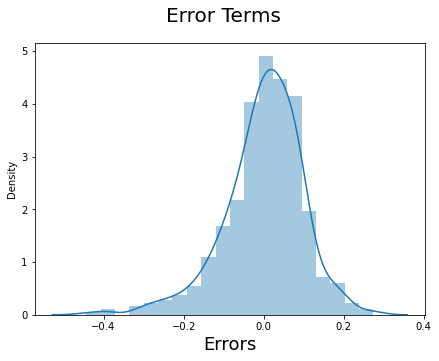

In [53]:
res = y_train - y_train_pred

fig = plt.figure(figsize=[7,5])

sns.distplot((res), bins = 20)

fig.suptitle('Error Terms', fontsize = 20)      
plt.xlabel('Errors', fontsize = 18)
plt.show()

### Check for Homoscadascity

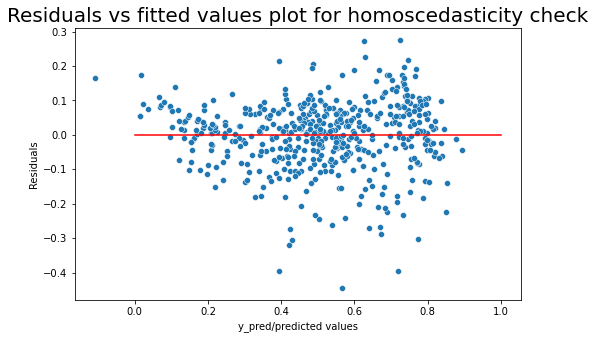

In [54]:
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

### Prediction using Final model:

In [64]:
print(y_test.shape)
print(X_test.shape)

(219,)
(219, 29)


In [65]:
col_test = X_train_rfe4.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_model4 = sm.add_constant(X_test)

X_test_model4.head()

,const,Temperature,WindSpeed,Season_2,Season_4,Year_1,Month_9,Holiday_1,Weekday_1,Weekday_3,Weekday_4,Weekday_5,Weather_3
333,1.0,0.331287,0.512845,0,1,0,0,0,0,0,0,1,0
203,1.0,0.984424,0.224357,0,0,0,0,0,1,0,0,0,0
279,1.0,0.562844,0.000000,0,1,0,0,0,0,0,0,0,0
483,1.0,0.497426,0.194850,1,0,1,0,0,1,0,0,0,0
267,1.0,0.716524,0.057698,0,1,0,1,0,0,0,0,0,0


In [66]:
y_test_pred = model4.predict(X_test_model4)

Text(0, 0.5, 'y_test_pred')

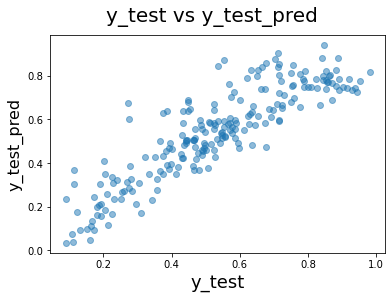

In [68]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)

fig.suptitle('y_test vs y_test_pred', fontsize = 20)  
 
plt.xlabel('y_test', fontsize = 18)                         
plt.ylabel('y_test_pred', fontsize = 16) 

### Residual analysis:

### R squared

In [69]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 76.44
Train data r^2 : 80.59


### Adjusted R Squared

In [71]:
n = X_test.shape[0]
n1 = X_train_rfe4.shape[0]

p = X_test.shape[1]
p1 = X_train_rfe4.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 75.06
Train data adjusted r^2 : 80.12
